In [130]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the json file with read_json

In [7]:
business = pd.read_json('C:\\Users\\Sam Cannon\\Desktop\\Python\\Springboard\\Yelp Project\\business.json', lines = True)

In [9]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


Now I am going to look at the Restaurants included in this dataframe of businesses

In [93]:
restaurants = business[business.categories.str.contains('Restaurant') == True].sort_values('stars', ascending = False).reset_index().drop('index', axis = 1)

In [110]:
restaurants.shape

(59387, 4)

Now I want to look at the categories within the Restaurants dataframe that have the most reviews

In [168]:
restaurants['categories'].apply(pd.Series).stack().head()

0  0    Pets, American (Traditional), Restaurants, Pet...
1  0    Food, Restaurants, Bakeries, Specialty Food, C...
2  0    Food Trucks, Food, Restaurants, Breakfast & Br...
3  0    Specialty Food, Halal, Food, Indian, Ethnic Fo...
4  0                 Modern European, Fondue, Restaurants
dtype: object

In [134]:
restaurant_category_counts = restaurants['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)
restaurant_category_counts.nlargest(10)

Restaurants, Pizza                     1042
Pizza, Restaurants                      993
Mexican, Restaurants                    885
Restaurants, Mexican                    853
Chinese, Restaurants                    840
Restaurants, Chinese                    789
Restaurants, Italian                    474
Italian, Restaurants                    446
American (Traditional), Restaurants     282
Vietnamese, Restaurants                 272
dtype: int64

In [139]:
restaurant_category_counts = pd.DataFrame(restaurant_category_counts)

In [143]:
cats = restaurant_category_counts.reset_index().rename(columns = {'index':'restaurant', 0:'number_of_reviews'})

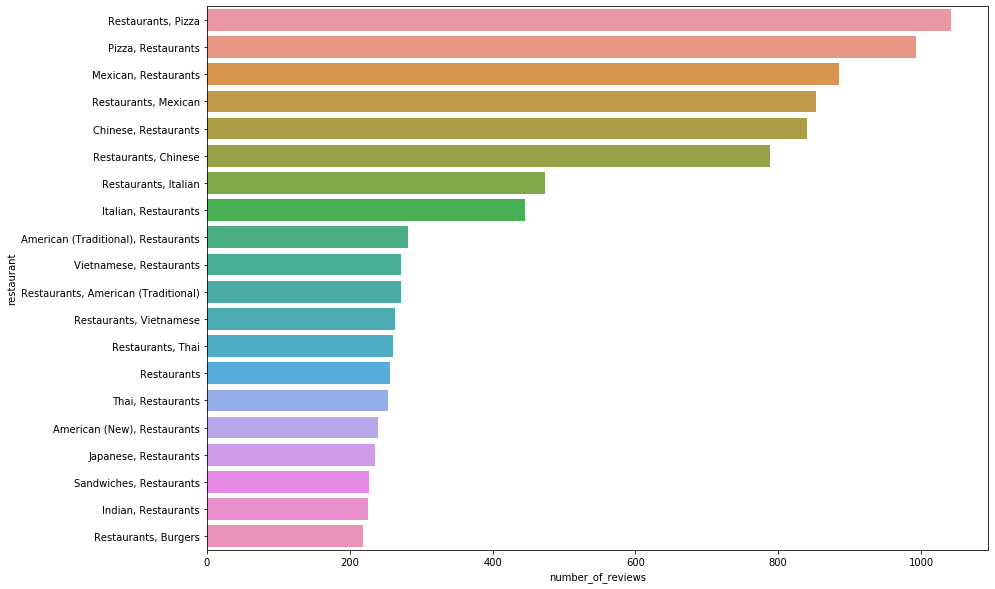

In [147]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.barplot(data = cats, x = 'number_of_reviews', y = 'restaurant')

Save a dataframe containing the ids, review counts, stars, and state of each Pizza or Mexican food business

In [164]:
final_df = business[business.categories.str.contains('Pizza|Mexican') == True].sort_values('categories').reset_index(drop = True).drop(['address', 
                                        'attributes', 'city', 'categories', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code'], axis = 1)
final_df.head()

,business_id,review_count,stars,state
0,6HelOB6YrvhW_p_qsV0Zmw,5,4.0,AZ
1,4P0X_Mfb0HEmvXR47w_xWg,13,4.0,AZ
2,GtxwFRoQTitTa6u3oVgS0g,9,5.0,OH
3,sxQrSzv4SS4b6o3tgmWS7A,16,3.0,PA
4,QmvtdOl4PEiMizrMyEQZTg,7,2.0,ON


In [166]:
final_df.shape

(11398, 4)

In [165]:
final_df.to_csv('business_list.csv')